In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

Below is a code snippet from my data processing file which takes an image downsizes it to 512x512, reshapes the dimesions and creates the sobel representation

### Issue:
When I plot the processed sobel data (stored in the rescaled_sobel variable) in matplotlib, the result is different from the unprocessed data (stored in sobelx_values variable). I would expect plotting the unprocessed and processed sobel data to look the same. See plots below. 

In [97]:
intensity_image = cv2.imread('/home/bea/Documents/Sheet_1_000_X001_Y001_G001_A001_I.tiff') # load in 1024x1024x3 image
down_samp = cv2.resize(intensity_image, (512,512), interpolation=cv2.INTER_LINEAR) # downsize image to 512x512x3
reshaped_intensity = np.mean(down_samp, axis=-1) # Average the color channels together (size 512x512)
image_array = np.expand_dims(reshaped_intensity, axis=-1) # change shape to 512x512x1
rescaled_array = image_array/255.0 # do min max normalization


# get sobel values
sobelx_values = cv2.Sobel(src=down_samp, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # get sobelx values from down_samp
sobelx_values[sobelx_values>0] = 1
sobelx_values[sobelx_values<0] = 0
reshaped_sobel = np.mean(sobelx_values, axis=-1) # average color channels
sobelx_array = np.expand_dims(reshaped_sobel, axis=-1) # change shape to 512x512x1



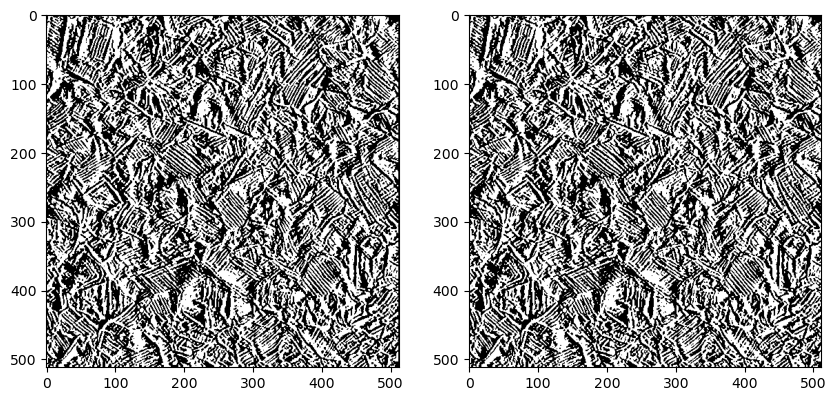

In [98]:
f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sobelx_values, cmap='grey') 
ax[1].imshow(sobelx_array, cmap='grey') 

In [95]:
sobelx_values1 = cv2.Sobel(src=down_samp, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # get sobelx values from down_samp
#print(sobelx_values1>300)
sobelx_values1[sobelx_values1<128] = 0
sobelx_values1[sobelx_values1>=128] = 1

sobelx_values1

array([[[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [70]:
sobelx_values1 = cv2.Sobel(src=down_samp, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobelx_values1

array([[[   0.,    0.,    0.],
        [ 854.,  854.,  854.],
        [ 754.,  754.,  754.],
        ...,
        [-240., -240., -240.],
        [ -66.,  -66.,  -66.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [ 627.,  627.,  627.],
        [ 784.,  784.,  784.],
        ...,
        [-359., -359., -359.],
        [-166., -166., -166.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [-365., -365., -365.],
        [ 165.,  165.,  165.],
        ...,
        [-465., -465., -465.],
        [-180., -180., -180.],
        [   0.,    0.,    0.]],

       ...,

       [[   0.,    0.,    0.],
        [ 607.,  607.,  607.],
        [ 376.,  376.,  376.],
        ...,
        [-291., -291., -291.],
        [-188., -188., -188.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [ 691.,  691.,  691.],
        [ 437.,  437.,  437.],
        ...,
        [-124., -124., -124.],
        [ -74.,  -74.,  -74.],
        [   0.,

In [32]:
sobelx_array

array([[[  0.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       ...,

       [[  0.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [255.],
        [255.],
        ...,
        [  0.],
        [  0.],
        [  0.]]])

In [5]:
min_sobel

-6882.0

In [ ]:
while True:
    cv2.imshow("Sheep", rescaled_sobel)
    cv2.waitKey(0)
    sys.exit()

cv2.destroyAllWindows()

In [18]:
sobelx_array[0]==sobelx_values[0]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [20]:
for row in sobelx_values[0]:
    check1 = np.all(row==row[0])
    #check2 = np.all(sobelx_array==sob)
    if check1 == False:
        print("check1 is false")

In [23]:
check2 = np.all(sobelx_array==sobelx_values)
if check2 == False:
    print("check2 is false")

In [8]:
reshaped_sobel

array([[   0.,  854.,  754., ..., -240.,  -66.,    0.],
       [   0.,  627.,  784., ..., -359., -166.,    0.],
       [   0., -365.,  165., ..., -465., -180.,    0.],
       ...,
       [   0.,  607.,  376., ..., -291., -188.,    0.],
       [   0.,  691.,  437., ..., -124.,  -74.,    0.],
       [   0.,  770.,  536., ...,  -94.,  -24.,    0.]])

In [7]:
sobelx_array

array([[[   0.],
        [ 854.],
        [ 754.],
        ...,
        [-240.],
        [ -66.],
        [   0.]],

       [[   0.],
        [ 627.],
        [ 784.],
        ...,
        [-359.],
        [-166.],
        [   0.]],

       [[   0.],
        [-365.],
        [ 165.],
        ...,
        [-465.],
        [-180.],
        [   0.]],

       ...,

       [[   0.],
        [ 607.],
        [ 376.],
        ...,
        [-291.],
        [-188.],
        [   0.]],

       [[   0.],
        [ 691.],
        [ 437.],
        ...,
        [-124.],
        [ -74.],
        [   0.]],

       [[   0.],
        [ 770.],
        [ 536.],
        ...,
        [ -94.],
        [ -24.],
        [   0.]]])

In [10]:
rescaled_sobel

array([[[0.4835242 ],
        [0.54352561],
        [0.53649968],
        ...,
        [0.46666198],
        [0.47888709],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.52757676],
        [0.53860746],
        ...,
        [0.45830113],
        [0.47186117],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.45787958],
        [0.49511698],
        ...,
        [0.45085365],
        [0.47087754],
        [0.4835242 ]],

       ...,

       [[0.4835242 ],
        [0.52617157],
        [0.50994168],
        ...,
        [0.46307876],
        [0.47031546],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.53207335],
        [0.5142275 ],
        ...,
        [0.47481206],
        [0.47832502],
        [0.4835242 ]],

       [[0.4835242 ],
        [0.53762383],
        [0.52118317],
        ...,
        [0.47691983],
        [0.48183798],
        [0.4835242 ]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


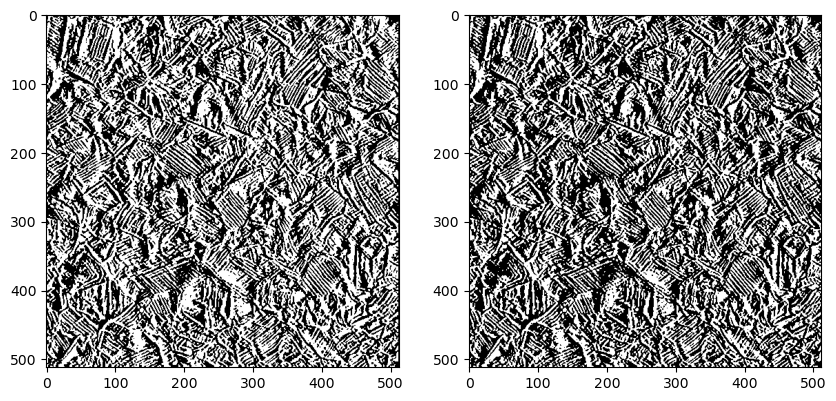

In [96]:
# comparing different sobel cutoffs
f, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sobelx_values, cmap='grey') # cutoff at 0
ax[1].imshow(sobelx_values1, cmap='grey') # cutoff at 128

In [54]:
sobelx_values.mean()

128.3774185180664

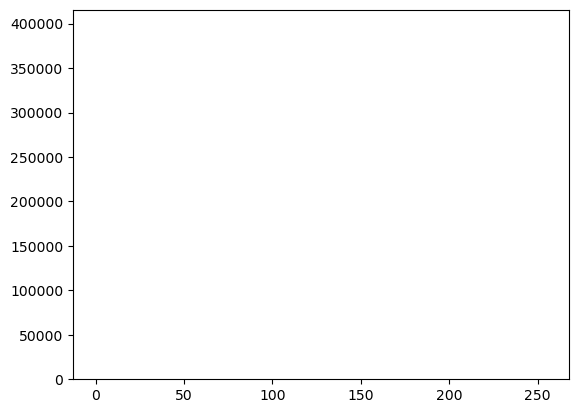

In [52]:
plt.hist(sobelx_values.flatten(), bins = 1000)
plt.show()

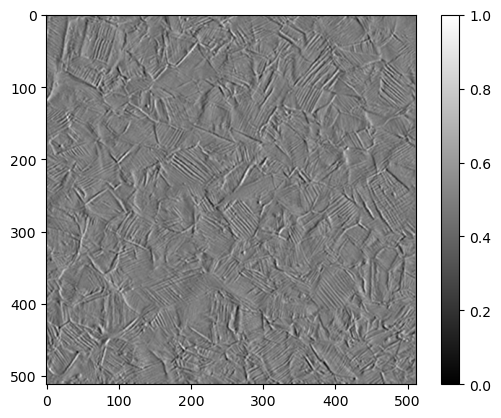

In [20]:
# processed sobel data
plt.imshow(np.round(rescaled_sobel,2), cmap='grey')
plt.colorbar()

In [21]:
np.round(rescaled_sobel,2)

array([[[0.48],
        [0.54],
        [0.54],
        ...,
        [0.47],
        [0.48],
        [0.48]],

       [[0.48],
        [0.53],
        [0.54],
        ...,
        [0.46],
        [0.47],
        [0.48]],

       [[0.48],
        [0.46],
        [0.5 ],
        ...,
        [0.45],
        [0.47],
        [0.48]],

       ...,

       [[0.48],
        [0.53],
        [0.51],
        ...,
        [0.46],
        [0.47],
        [0.48]],

       [[0.48],
        [0.53],
        [0.51],
        ...,
        [0.47],
        [0.48],
        [0.48]],

       [[0.48],
        [0.54],
        [0.52],
        ...,
        [0.48],
        [0.48],
        [0.48]]])

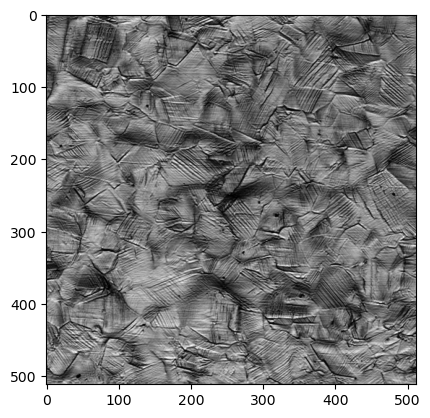

In [16]:
# 512x512 version of origninal image
plt.imshow(reshaped_intensity, cmap='grey')